# Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing Dataset

In [6]:
data=pd.read_csv("/home/user/sleep_disorder.csv")

In [7]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Knowing about data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [9]:
data.describe()  

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [10]:
data.shape

(374, 13)

# Finding null values

In [11]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [12]:
data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [13]:
data['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

# Handling null values

In [14]:
data['Sleep Disorder']=data['Sleep Disorder'].fillna("nothing")

In [15]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [16]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

# Encoding data

In [17]:
d1=pd.get_dummies(data['BMI Category'],dtype=int)

In [18]:
d1.head()

,Normal,Normal Weight,Obese,Overweight
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [19]:
d2=d1.drop('Normal Weight',axis=1)

In [20]:
d2.head()

,Normal,Obese,Overweight
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [21]:
data1=pd.concat([data,d2],axis=1)

In [22]:
data1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Normal,Obese,Overweight
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,nothing,0,0,1
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,nothing,1,0,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,nothing,1,0,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0,1,0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0,1,0


In [23]:
data2=data1.drop('BMI Category',axis=1)

In [24]:
data2.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Normal,Obese,Overweight
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,4200,nothing,0,0,1
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,nothing,1,0,0
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,10000,nothing,1,0,0
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,0,1,0
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,3000,Sleep Apnea,0,1,0


In [25]:
data.Occupation.unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [26]:
count=data.Occupation.value_counts()

In [27]:
count

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [28]:
less_count=count[count>10]

In [29]:
less_count

Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
Name: count, dtype: int64

In [30]:
d3=pd.get_dummies(data.Occupation,dtype=int)

In [31]:
d3.head()

,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [32]:
d4=d3.drop('Manager',axis=1)

In [33]:
d4.head()

,Accountant,Doctor,Engineer,Lawyer,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [34]:
data3=pd.concat([data2,d4],axis=1)

In [35]:
data3.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,...,Accountant,Doctor,Engineer,Lawyer,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
0,1,Male,27,Software Engineer,6.1,6,42,6,126/83,77,...,0,0,0,0,0,0,0,0,1,0
1,2,Male,28,Doctor,6.2,6,60,8,125/80,75,...,0,1,0,0,0,0,0,0,0,0
2,3,Male,28,Doctor,6.2,6,60,8,125/80,75,...,0,1,0,0,0,0,0,0,0,0
3,4,Male,28,Sales Representative,5.9,4,30,8,140/90,85,...,0,0,0,0,0,1,0,0,0,0
4,5,Male,28,Sales Representative,5.9,4,30,8,140/90,85,...,0,0,0,0,0,1,0,0,0,0


In [36]:
data4=data3.drop('Occupation',axis=1)

In [37]:
data4.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,...,Accountant,Doctor,Engineer,Lawyer,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
0,1,Male,27,6.1,6,42,6,126/83,77,4200,...,0,0,0,0,0,0,0,0,1,0
1,2,Male,28,6.2,6,60,8,125/80,75,10000,...,0,1,0,0,0,0,0,0,0,0
2,3,Male,28,6.2,6,60,8,125/80,75,10000,...,0,1,0,0,0,0,0,0,0,0
3,4,Male,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0
4,5,Male,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0


In [38]:
def fun(x):
    for i in data.Gender:
        if i=='Male':
            return 0
        else:
            return 1

In [39]:
data4.Gender=data4.Gender.apply(fun)

In [40]:
data4.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,...,Accountant,Doctor,Engineer,Lawyer,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
0,1,0,27,6.1,6,42,6,126/83,77,4200,...,0,0,0,0,0,0,0,0,1,0
1,2,0,28,6.2,6,60,8,125/80,75,10000,...,0,1,0,0,0,0,0,0,0,0
2,3,0,28,6.2,6,60,8,125/80,75,10000,...,0,1,0,0,0,0,0,0,0,0
3,4,0,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0


In [41]:
data4.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Normal                     0
Obese                      0
Overweight                 0
Accountant                 0
Doctor                     0
Engineer                   0
Lawyer                     0
Nurse                      0
Sales Representative       0
Salesperson                0
Scientist                  0
Software Engineer          0
Teacher                    0
dtype: int64

In [42]:
data['Blood Pressure']

0      126/83
1      125/80
2      125/80
3      140/90
4      140/90
        ...  
369    140/95
370    140/95
371    140/95
372    140/95
373    140/95
Name: Blood Pressure, Length: 374, dtype: object

In [43]:
data4['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [44]:
data4[['Systolic', 'Diastolic']] = data4['Blood Pressure'].str.split('/', expand=True)

In [45]:
data4.drop('Blood Pressure',axis=1,inplace=True)

In [46]:
data4.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Engineer,Lawyer,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher,Systolic,Diastolic
0,1,0,27,6.1,6,42,6,77,4200,nothing,...,0,0,0,0,0,0,1,0,126,83
1,2,0,28,6.2,6,60,8,75,10000,nothing,...,0,0,0,0,0,0,0,0,125,80
2,3,0,28,6.2,6,60,8,75,10000,nothing,...,0,0,0,0,0,0,0,0,125,80
3,4,0,28,5.9,4,30,8,85,3000,Sleep Apnea,...,0,0,0,1,0,0,0,0,140,90
4,5,0,28,5.9,4,30,8,85,3000,Sleep Apnea,...,0,0,0,1,0,0,0,0,140,90


In [47]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

# Data Visualization

Text(0.5, 1.0, 'frequency of daily steps')

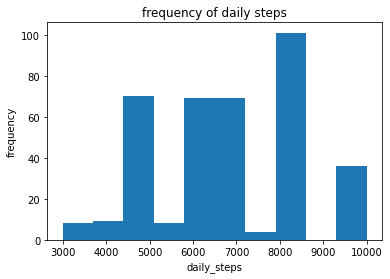

In [48]:
plt.hist(data['Daily Steps'])
plt.xlabel('daily_steps')
plt.ylabel('frequency')
plt.title('frequency of daily steps')

Text(0.5, 1.0, 'count of people who are having disorder')

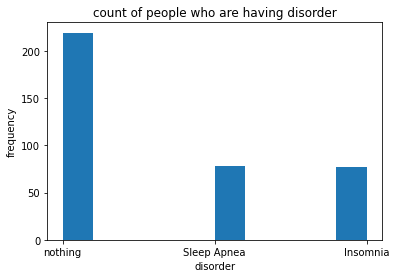

In [49]:
plt.hist(data['Sleep Disorder'])
plt.xlabel('disorder')
plt.ylabel('frequency')
plt.title('count of people who are having disorder')

Text(0, 0.5, 'sleep disorder')

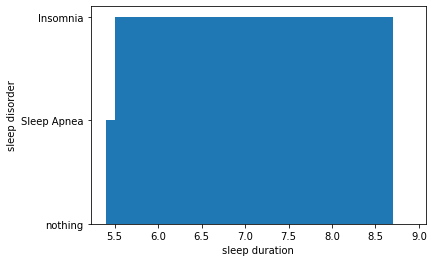

In [50]:
plt.bar(data['Sleep Duration'],data['Sleep Disorder'])
plt.xlabel('sleep duration')
plt.ylabel('sleep disorder')

Text(0.5, 1.0, 'frequency of heart rate')

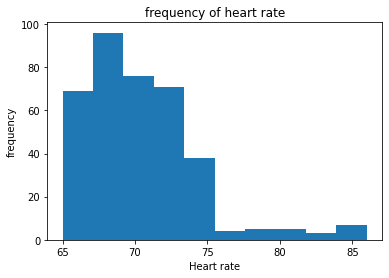

In [51]:
plt.hist(data['Heart Rate'])
plt.xlabel('Heart rate')
plt.ylabel('frequency')
plt.title('frequency of heart rate')

Text(0.5, 1.0, 'relation between BMI Category and sleep disorder')

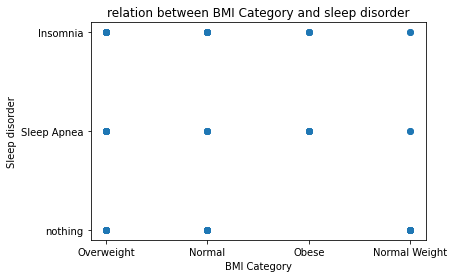

In [52]:
plt.scatter(data['BMI Category'],data['Sleep Disorder'])
plt.xlabel('BMI Category')
plt.ylabel('Sleep disorder')
plt.title('relation between BMI Category and sleep disorder')

Text(0.5, 1.0, 'relation between Age and sleep disorder')

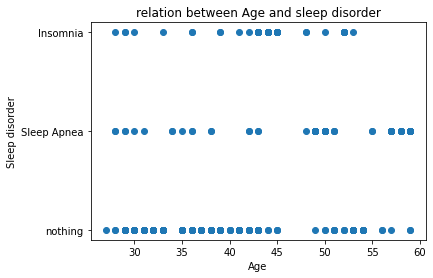

In [53]:
plt.scatter(data['Age'],data['Sleep Disorder'])
plt.xlabel('Age')
plt.ylabel('Sleep disorder')
plt.title('relation between Age and sleep disorder')

Text(0.5, 1.0, 'relation between Physical Activity Level and sleep disorder')

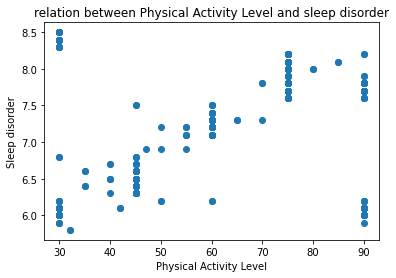

In [54]:
plt.scatter(data['Physical Activity Level'],data['Sleep Duration'])
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep disorder')
plt.title('relation between Physical Activity Level and sleep disorder')

Text(0.5, 1.0, 'relation between Heart Rate and sleep disorder')

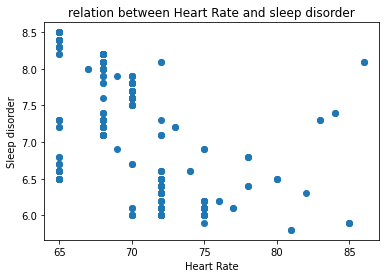

In [55]:
plt.scatter(data['Heart Rate'],data['Sleep Duration'])
plt.xlabel('Heart Rate')
plt.ylabel('Sleep disorder')
plt.title('relation between Heart Rate and sleep disorder')

{'whiskers': [<matplotlib.lines.Line2D at 0x757874b5a170>,
 'caps': [<matplotlib.lines.Line2D at 0x757874b5a7a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x757874b59ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x757874b5acb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x757874b5af80>],
 'means': []}

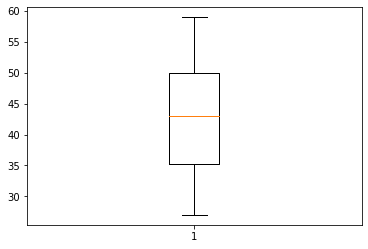

In [56]:
plt.boxplot(data4.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x757874bd44f0>,
 'caps': [<matplotlib.lines.Line2D at 0x757874bd4a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x757874bd4220>],
 'medians': [<matplotlib.lines.Line2D at 0x757874bd5030>],
 'fliers': [<matplotlib.lines.Line2D at 0x757874bd5300>],
 'means': []}

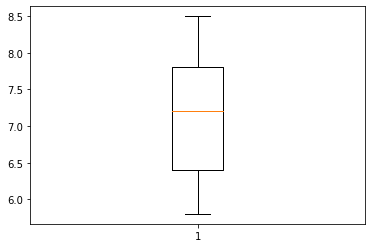

In [57]:
plt.boxplot(data4['Sleep Duration'])

{'whiskers': [<matplotlib.lines.Line2D at 0x757874a1a500>,
 'caps': [<matplotlib.lines.Line2D at 0x757874a1aaa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x757874a1a200>],
 'medians': [<matplotlib.lines.Line2D at 0x757874a1b040>],
 'fliers': [<matplotlib.lines.Line2D at 0x757874a1b310>],
 'means': []}

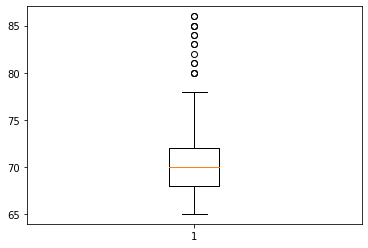

In [58]:
plt.boxplot(data4['Heart Rate'])

{'whiskers': [<matplotlib.lines.Line2D at 0x757874a84700>,
 'caps': [<matplotlib.lines.Line2D at 0x757874a84ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x757874a84430>],
 'medians': [<matplotlib.lines.Line2D at 0x757874a85240>],
 'fliers': [<matplotlib.lines.Line2D at 0x757874a85510>],
 'means': []}

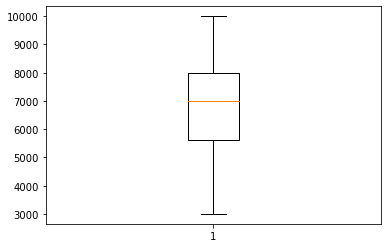

In [59]:
plt.boxplot(data['Daily Steps'])

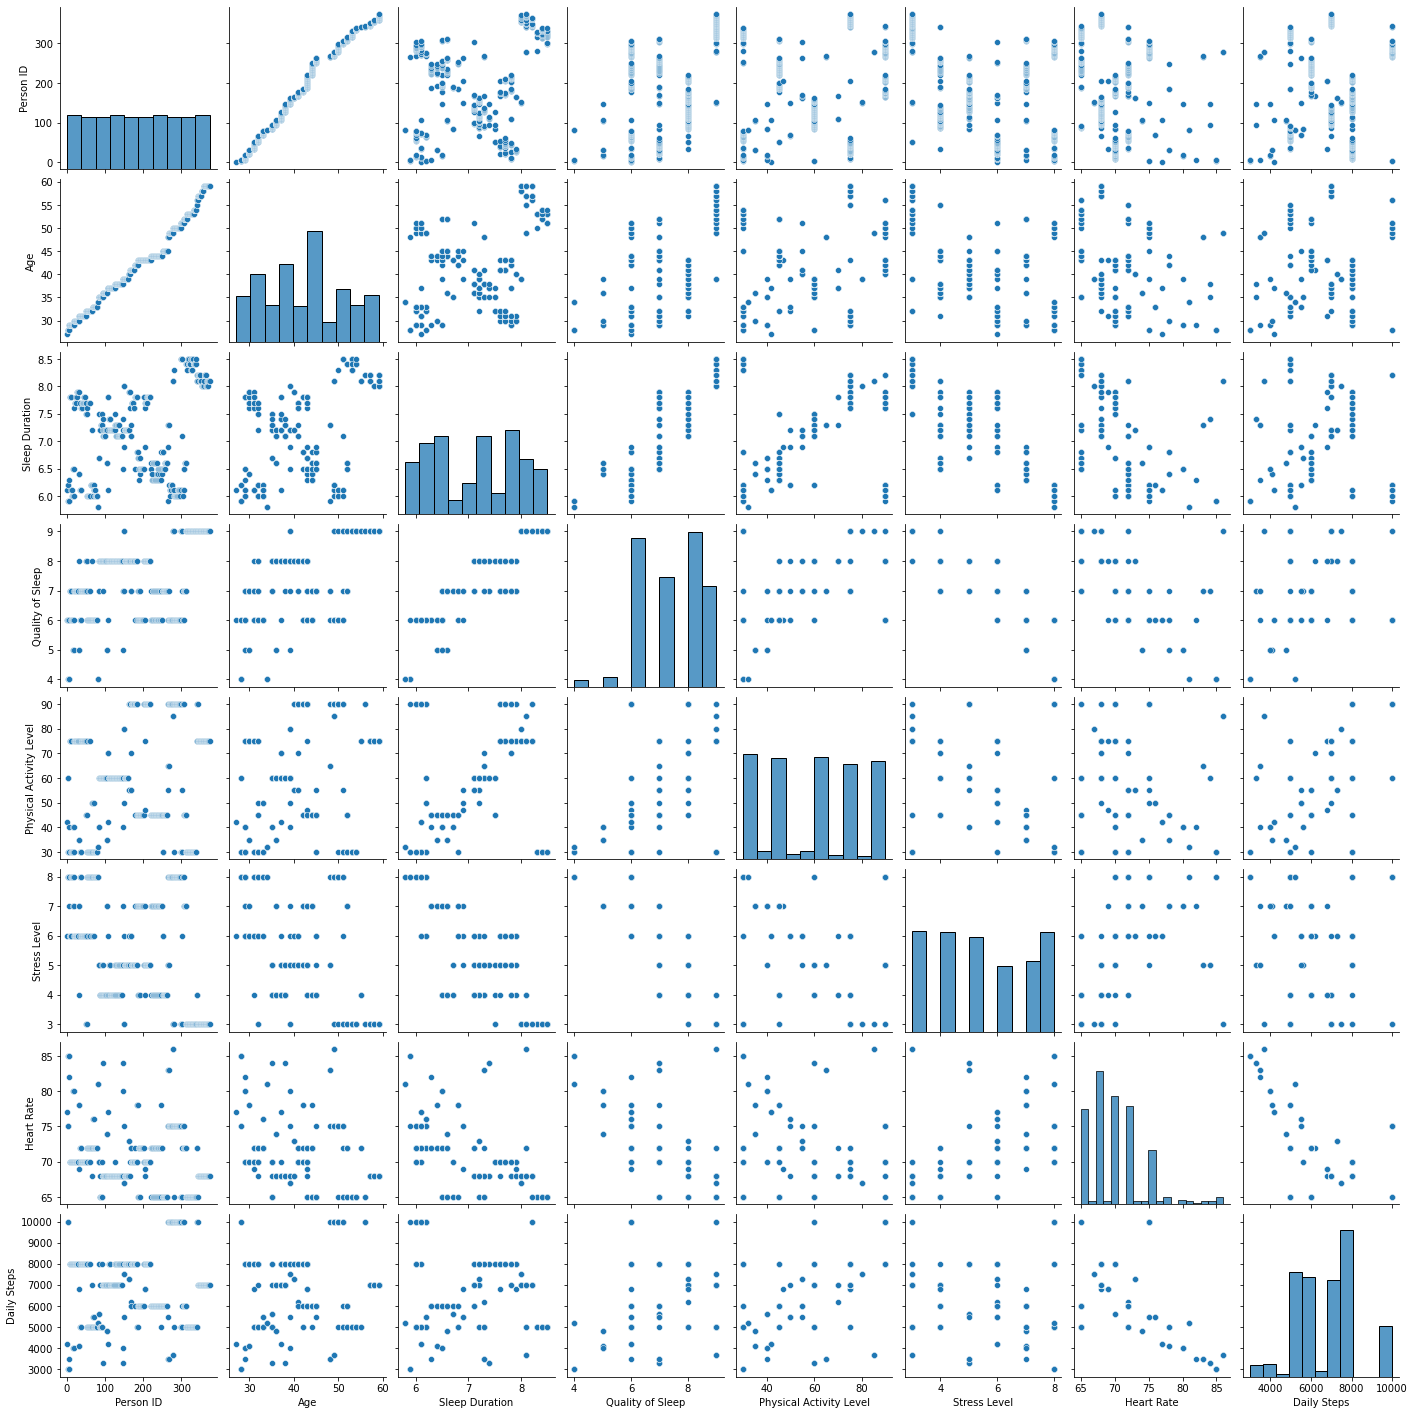

In [82]:
sns.pairplot(data)

# Removal of outliers

In [60]:
def remove_outliers(data,column):
    Q1,Q3=data[column].quantile([0.25,0.75])
    IQR=Q3-Q1
    lf=Q1-1.5*(IQR)
    uf=Q3+1.5*(IQR)
    data=data[(data[column]>=lf) & (data[column]<=uf)]
    return data

In [61]:
data4=remove_outliers(data4,'Heart Rate')

In [62]:
data4.shape

(359, 25)

# Feature Engineering

In [63]:
x=data4.drop(['Sleep Disorder','Person ID'],axis=1)

In [64]:
x.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Normal,Obese,...,Engineer,Lawyer,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher,Systolic,Diastolic
0,0,27,6.1,6,42,6,77,4200,0,0,...,0,0,0,0,0,0,1,0,126,83
1,0,28,6.2,6,60,8,75,10000,1,0,...,0,0,0,0,0,0,0,0,125,80
2,0,28,6.2,6,60,8,75,10000,1,0,...,0,0,0,0,0,0,0,0,125,80
7,0,29,7.8,7,75,6,70,8000,1,0,...,0,0,0,0,0,0,0,0,120,80
8,0,29,7.8,7,75,6,70,8000,1,0,...,0,0,0,0,0,0,0,0,120,80


In [65]:
y=data4['Sleep Disorder']

In [66]:
y.head()

0    nothing
1    nothing
2    nothing
7    nothing
8    nothing
Name: Sleep Disorder, dtype: object

# Data splitting

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [69]:
len(x_train)

287

In [70]:
len(x_test)

72

# Model

In [71]:
from sklearn import tree

In [72]:
model=tree.DecisionTreeClassifier(class_weight='balanced')

In [73]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [74]:
y_pred=model.predict(x_test)

In [75]:
y_pred

array(['Insomnia', 'nothing', 'nothing', 'nothing', 'nothing',
       'Sleep Apnea', 'nothing', 'nothing', 'Insomnia', 'nothing',
       'nothing', 'Sleep Apnea', 'Insomnia', 'Sleep Apnea', 'nothing',
       'nothing', 'nothing', 'nothing', 'nothing', 'Sleep Apnea',
       'nothing', 'Insomnia', 'nothing', 'nothing', 'nothing', 'Insomnia',
       'nothing', 'Sleep Apnea', 'Sleep Apnea', 'nothing', 'Sleep Apnea',
       'Sleep Apnea', 'Sleep Apnea', 'nothing', 'nothing', 'nothing',
       'nothing', 'Sleep Apnea', 'Insomnia', 'nothing', 'Insomnia',
       'nothing', 'nothing', 'nothing', 'nothing', 'Insomnia', 'nothing',
       'nothing', 'nothing', 'Sleep Apnea', 'nothing', 'Insomnia',
       'Insomnia', 'nothing', 'Sleep Apnea', 'nothing', 'nothing',
       'nothing', 'nothing', 'nothing', 'nothing', 'nothing', 'Insomnia',
       'nothing', 'nothing', 'nothing', 'Sleep Apnea', 'nothing',
       'Sleep Apnea', 'Sleep Apnea', 'nothing', 'nothing'], dtype=object)

# Evalution metrics

In [76]:
model.score(x_test,y_test)

0.9166666666666666

In [77]:
from sklearn.metrics import confusion_matrix,classification_report

In [78]:
cm=confusion_matrix(y_test,y_pred)

In [79]:
cm

array([[ 9,  1,  1],
       [ 1, 12,  0],
       [ 1,  2, 45]])

In [80]:
report=classification_report(y_test,y_pred)

In [81]:
report

'              precision    recall  f1-score   support\n\n    Insomnia       0.82      0.82      0.82        11\n Sleep Apnea       0.80      0.92      0.86        13\n     nothing       0.98      0.94      0.96        48\n\n    accuracy                           0.92        72\n   macro avg       0.87      0.89      0.88        72\nweighted avg       0.92      0.92      0.92        72\n'